Kết nối Colab với Google Drive để lấy dữ liệu

Cài đặt thư viện Gensim cho việc train model Word2Vec

In [1]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import các thư viện cần thiết

In [2]:
import os
import re
import pandas as pd
import string
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load tập dữ liệu từ thư mục trong Google Drive

In [3]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, encoding="latin")
    
train_data = load_data("queen.csv").iloc[:4000]

train_data = train_data["tweet"].to_list()
# train_data = "\n".join(train_data)

stopwords_list=stopwords.words('english')

def clean_data(w):
    w = w.lower()
    w = re.sub(r"'s\b","", w)
    w = re.sub("[^a-zA-Z]", " ", w)
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)


def get_inp(list_sent):
    sent=list(map(clean_data, list_sent))
    sent=list(map(lambda x: x.split(" "), sent))
    return sent

# print(train_data[:1000])
inp_data=get_inp(train_data)
print(inp_data[:5])

[['professional', 'development', 'join', 'people', 'across', 'united', 'kingdom', 'around', 'world', 'mourning', 'death', 'majesty', 'queen', 'elizabeth', 'extend', 'deepest', 'condolences', 'majesty', 'members', 'royal', 'family', 'https', 'lcmg', 'https', 'yxlmbearrb'], ['join', 'remembering', 'majesty', 'queen', 'elizabeth', 'whose', 'passing', 'brought', 'great', 'sadness', 'team', 'postbox', 'pass', 'condolences', 'royal', 'family', 'anyone', 'affected', 'difficult', 'time', 'https', 'hclnjo'], ['life', 'seems', 'hard', 'courageous', 'lie', 'accept', 'defeat', 'instead', 'determined', 'struggle', 'better', 'future', 'queen', 'elizabeth', 'queenelizabeth', 'worldchanger', 'leadership', 'https'], ['join', 'nation', 'mourning', 'death', 'majesty', 'queen', 'elizabeth', 'heartfelt', 'thoughts', 'royal', 'family', 'nation', 'commonwealth', 'time', 'https', 'zhucc'], ['saddened', 'death', 'majesty', 'queen', 'elizabeth', 'thoughts', 'family', 'affected', 'news', 'mark', 'respect', 'time

Train model Word2Vec. Trong quá trình train, có bạn có thể chỉnh sử dụng GPU của Colab để đẩy nhanh tiến độ bằng cách vào Rumtime => Change Runtime Type và chọn GPU

In [4]:
# Skipgram model
model = Word2Vec(inp_data, min_count = 1, size = 256, window = 5, sg = 1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_skipgram.bin')


# CBOW model
model = Word2Vec(inp_data, min_count = 1, size = 256, window = 5, sg = 0)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_CBOW.bin')


Sau khi có model. Ta tiến hành load mô hình

In [5]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from scipy.spatial import distance
path = 'word2vec_CBOW.bin'
model = gensim.models.KeyedVectors.load(path)

In [6]:
with open("vocab.txt", "w", encoding="utf-8") as f:
    for x in model.wv.vocab.keys():
        f.write(x + "\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Test kết quả

In [9]:
model.most_similar(positive=['queen'], topn=10)

[('majesty', 0.6470330953598022),
 ('https', 0.5441297292709351),
 ('rest', 0.5248655080795288),
 ('amp', 0.5194936990737915),
 ('time', 0.49669355154037476),
 ('service', 0.4823899269104004),
 ('royal', 0.4766703248023987),
 ('nation', 0.4701908230781555),
 ('world', 0.46696794033050537),
 ('family', 0.4642457664012909)]

In [14]:
model.most_similar(positive=['elizabeth'], topn=10)

[('majesty', 0.5466067790985107),
 ('rest', 0.4782409369945526),
 ('queenelizabethii', 0.45541489124298096),
 ('amp', 0.45192208886146545),
 ('time', 0.44898730516433716),
 ('nation', 0.4338051676750183),
 ('world', 0.42761239409446716),
 ('https', 0.4222804009914398),
 ('royal', 0.4217059910297394),
 ('people', 0.41837698221206665)]

In [12]:
word_0 = "birmingham"
word_1 = "elizabeth"
word_2 = "queen"

word_0_eb = model[word_0]
word_1_eb = model[word_1]
word_2_eb = model[word_2]

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  29.971527099609375
1 vs 2:  28.08365821838379
2 vs 0:  28.752044677734375


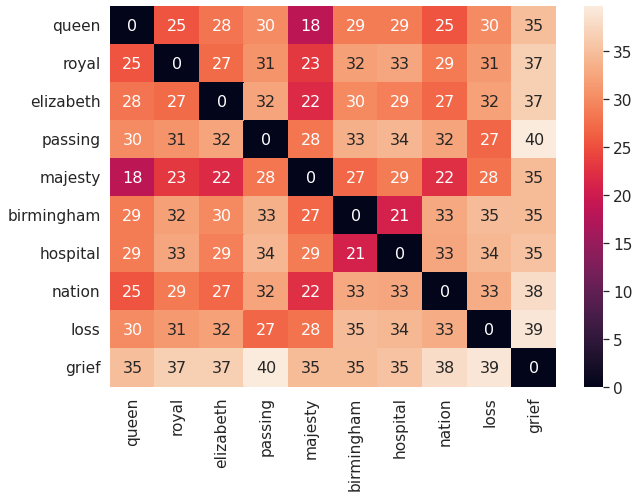

In [13]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["queen", "royal", "elizabeth", "passing", "majesty", "birmingham", "hospital", "nation", "loss", "grief"]
list_word_embs = list(map(lambda x: model[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
